# 1️. IMPORT THƯ VIỆN

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import shap
import warnings
from matplotlib.lines import Line2D
warnings.filterwarnings('ignore')

# 2️. ĐỌC & KHÁM PHÁ DỮ LIỆU

In [144]:
df = pd.read_csv("bank_churn_vn.csv")
print("Kích thước dữ liệu:", df.shape)

print("\n5 dòng đầu tiên:")
print(display(df.head()))

print("\nKiểu dữ liệu các cột:")
print(df.info())

print("\nThống kê mô tả:")
print(display(df.describe(include='all')))

print("\nGiá trị thiếu:")
print(df.isnull().sum())

Kích thước dữ liệu: (9460, 14)

5 dòng đầu tiên:


,RowNumber,CustomerId,FullName,CreditScore,Province,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,2,15647311,Đặng Hải Hải,608.0,TP.HCM,Female,41.0,1,83807.86,1,0,1,112542.58,0
1,4,15701354,Hoàng Thị Hải,699.0,TP.HCM,Female,39.0,1,0.00,2,0,0,93826.63,0
2,5,15737888,Nguyễn Ngọc Khánh,850.0,Long An,Female,NaN,2,125510.82,1,1,1,79084.10,0
3,7,15592531,Phạm Hữu Tuấn,822.0,Long An,Male,50.0,7,0.00,2,1,1,10062.80,0
4,9,15792365,Hoàng Phương Hùng,NaN,Hải Phòng,Male,44.0,4,142051.07,2,0,1,NaN,0


None

Kiểu dữ liệu các cột:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9460 entries, 0 to 9459
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9460 non-null   int64  
 1   CustomerId       9460 non-null   int64  
 2   FullName         9460 non-null   object 
 3   CreditScore      7876 non-null   float64
 4   Province         9460 non-null   object 
 5   Gender           9460 non-null   object 
 6   Age              8454 non-null   object 
 7   Tenure           9460 non-null   int64  
 8   Balance          7936 non-null   float64
 9   NumOfProducts    9460 non-null   int64  
 10  HasCrCard        9460 non-null   int64  
 11  IsActiveMember   9460 non-null   int64  
 12  EstimatedSalary  8311 non-null   float64
 13  Exited           9460 non-null   int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 1.0+ MB
None

Thống kê mô tả:


,RowNumber,CustomerId,FullName,CreditScore,Province,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9460.000000,9.460000e+03,9460,7876.000000,9460,9460,8454,9460.000000,7.936000e+03,9460.000000,9460.000000,9460.000000,8311.000000,9460.000000
unique,NaN,NaN,2701,NaN,18,2,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Đặng Hữu Phúc,NaN,Bà Rịa - Vũng Tàu,Male,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,12,NaN,585,5225,462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4995.860254,1.569112e+07,NaN,635.214830,NaN,NaN,NaN,5.020719,8.992735e+04,1.535201,0.704334,0.528753,100255.625933,0.133192
std,2894.242095,7.194274e+04,NaN,129.130653,NaN,NaN,NaN,2.879104,1.380936e+05,0.558955,0.456366,0.499199,57451.069999,0.339801
min,2.000000,1.556570e+07,NaN,100.000000,NaN,NaN,NaN,0.000000,0.000000e+00,1.000000,0.000000,0.000000,90.070000,0.000000
25%,2488.750000,1.562869e+07,NaN,575.000000,NaN,NaN,NaN,3.000000,0.000000e+00,1.000000,0.000000,0.000000,51405.695000,0.000000
50%,4994.000000,1.569093e+07,NaN,649.000000,NaN,NaN,NaN,5.000000,9.600724e+04,2.000000,1.000000,1.000000,100998.500000,0.000000
75%,7512.250000,1.575375e+07,NaN,716.000000,NaN,NaN,NaN,7.000000,1.281581e+05,2.000000,1.000000,1.000000,149186.280000,0.000000


None

Giá trị thiếu:
RowNumber             0
CustomerId            0
FullName              0
CreditScore        1584
Province              0
Gender                0
Age                1006
Tenure                0
Balance            1524
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary    1149
Exited                0
dtype: int64


# 3️. LÀM SẠCH DỮ LIỆU 

In [120]:
# Xóa các dòng trùng lặp
df.drop_duplicates(inplace=True)

# Chuyển đổi kiểu dữ liệu
numeric_cols = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Chuẩn hóa cột mục tiêu
df['Exited'] = pd.to_numeric(df['Exited'], errors='coerce').fillna(0).astype(int)
# Xử lý giá trị bất thường (ngoài phạm vi hợp lý)
df.loc[(df['Age'] < 18) | (df['Age'] > 100), 'Age'] = np.nan
df.loc[(df['CreditScore'] < 0) | (df['CreditScore'] > 1000), 'CreditScore'] = np.nan
df.loc[df['EstimatedSalary'] > 1e7, 'EstimatedSalary'] = np.nan
# Điền giá trị còn thiếu
df.fillna(df.median(numeric_only=True), inplace=True)

# Chuẩn hóa chuỗi
df['Gender'] = df['Gender'].astype(str).str.strip().str.lower().replace({
    'male': 'Male', 'nam': 'Male', 'female': 'Female', 'nữ': 'Female'
})
df['Province'] = df['Province'].astype(str).str.strip()

print("Dữ liệu làm sạch hoàn tất.\n")

Dữ liệu làm sạch hoàn tất.



# 4️. TIỀN XỬ LÝ DỮ LIỆU & XỬ LÝ NGOẠI LAI

In [121]:
# Chuẩn hóa và mã hóa dữ liệu
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Province'] = le.fit_transform(df['Province'])

# Xử lý ngoại lai
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in ['CreditScore', 'Age', 'Balance']:
    df = remove_outliers_iqr(df, col)

print("Đã xử lý ngoại lai cho CreditScore, Age, Balance.")
print("Số dòng còn lại:", len(df))

Đã xử lý ngoại lai cho CreditScore, Age, Balance.
Số dòng còn lại: 8134


# 5️. CHUẨN HÓA & CHIA TẬP

In [122]:
# Chia dữ liệu & Chuẩn hóa
features = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Gender','Province']
X = df[features]
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Tiền xử lý hoàn tất.")
print("Tập train:", X_train.shape, "| Tập test:", X_test.shape, "\n")

Tiền xử lý hoàn tất.
Tập train: (6507, 10) | Tập test: (1627, 10) 



# 6️. CÂN BẰNG DỮ LIỆU (SMOTE)

In [123]:
# Cân bằng dữ liệu
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Trước SMOTE:", y_train.value_counts().to_dict())
print("Sau SMOTE :", pd.Series(y_train_res).value_counts().to_dict(), "\n")

Trước SMOTE: {0: 5713, 1: 794}
Sau SMOTE : {0: 5713, 1: 5713} 



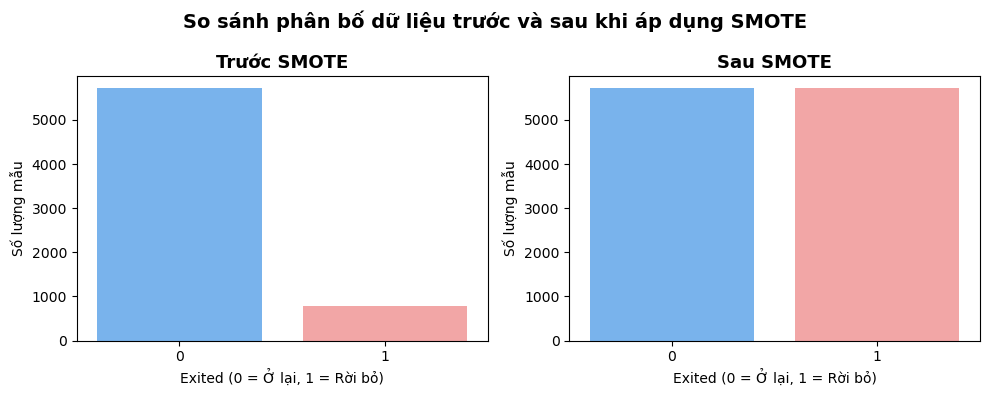

In [124]:
# Biểu đồ so sánh trước, sau cân bằng
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Trước SMOTE
sns.countplot(x=y_train, palette=['#66b3ff', '#ff9999'], ax=axes[0])
axes[0].set_title("Trước SMOTE", fontsize=13, fontweight='bold')
axes[0].set_xlabel("Exited (0 = Ở lại, 1 = Rời bỏ)")
axes[0].set_ylabel("Số lượng mẫu")

# Sau SMOTE
sns.countplot(x=y_train_res, palette=['#66b3ff', '#ff9999'], ax=axes[1])
axes[1].set_title("Sau SMOTE", fontsize=13, fontweight='bold')
axes[1].set_xlabel("Exited (0 = Ở lại, 1 = Rời bỏ)")
axes[1].set_ylabel("Số lượng mẫu")

plt.suptitle("So sánh phân bố dữ liệu trước và sau khi áp dụng SMOTE", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 7️. KHÁM PHÁ DỮ LIỆU (EDA)

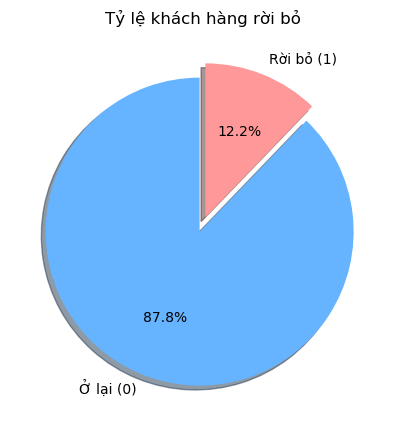

In [125]:
# Pie Chart - Tỷ lệ rời bỏ
plt.figure(figsize=(5,5))
churn_counts = df['Exited'].value_counts()
plt.pie(churn_counts, labels=['Ở lại (0)','Rời bỏ (1)'], autopct='%1.1f%%', colors=['#66b3ff','#ff9999'],
        explode=(0.05,0.05), startangle=90, shadow=True)
plt.title("Tỷ lệ khách hàng rời bỏ")
plt.show()

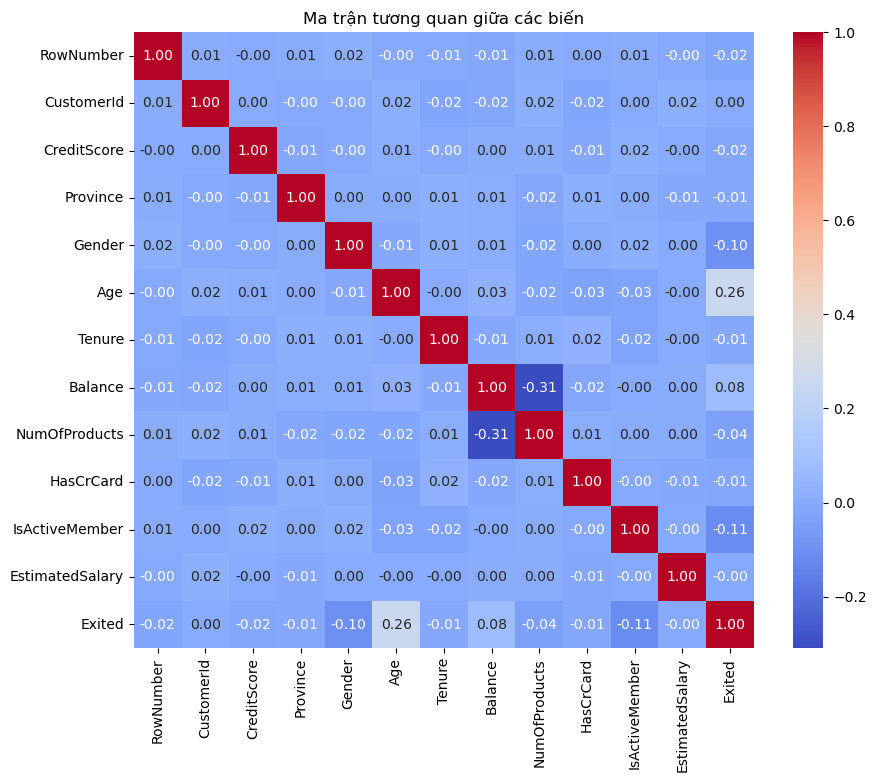

In [126]:
# Heatmap - Ma trận tương quan
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ma trận tương quan giữa các biến")
plt.show()

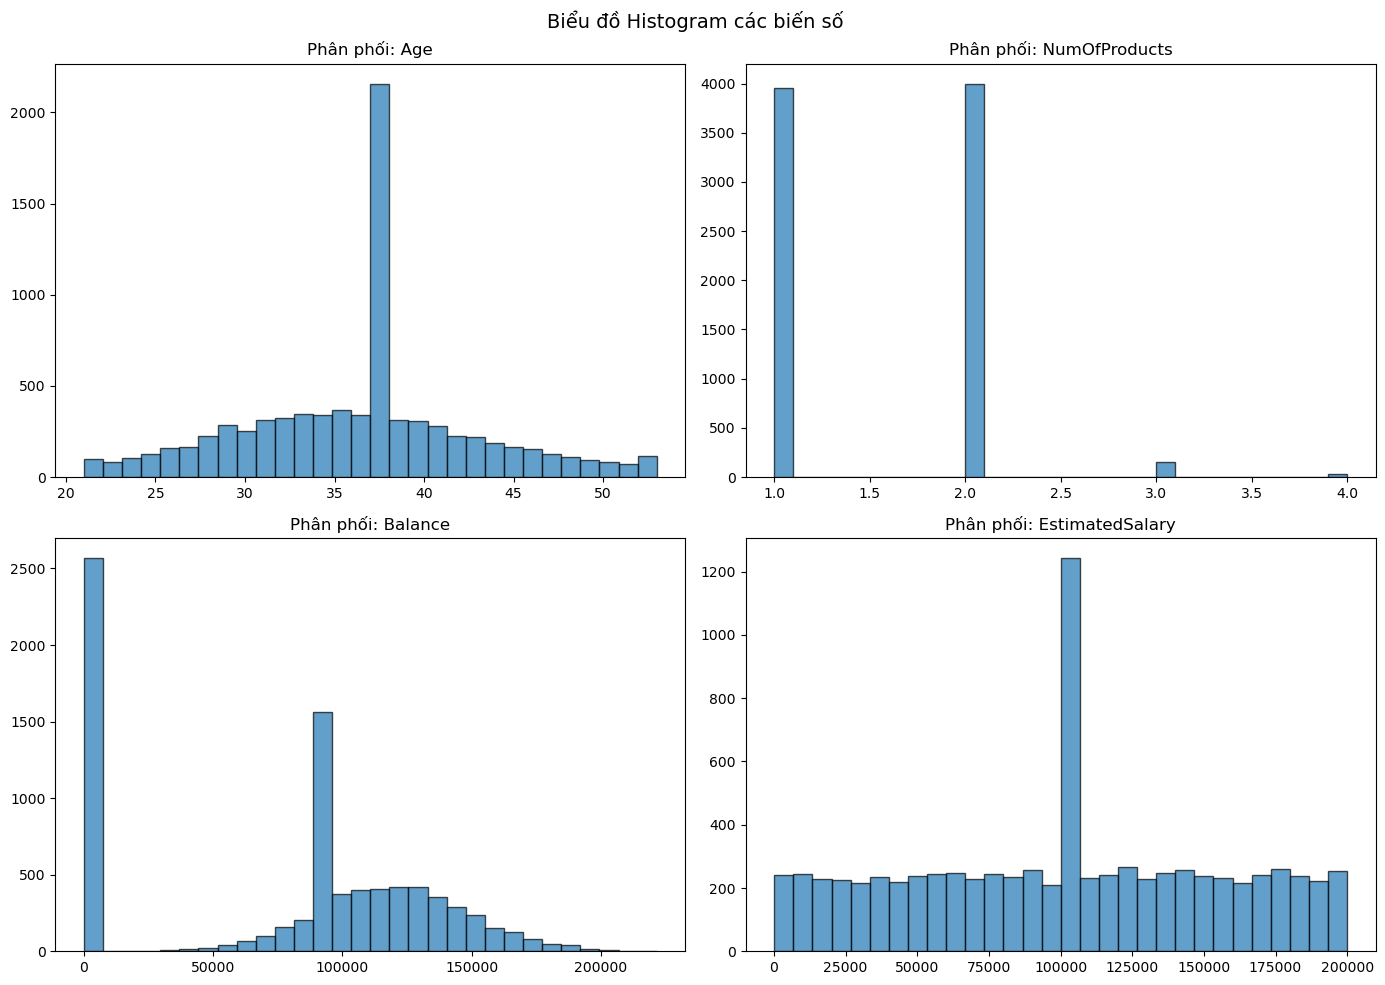

In [127]:
# Histogram - Phân phối các biến số
numeric_cols = ['Age','NumOfProducts','Balance','EstimatedSalary']
plt.figure(figsize=(14,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2,2,i)
    plt.hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Phân phối: {col}')
plt.suptitle("Biểu đồ Histogram các biến số", fontsize=14)
plt.tight_layout()
plt.show()

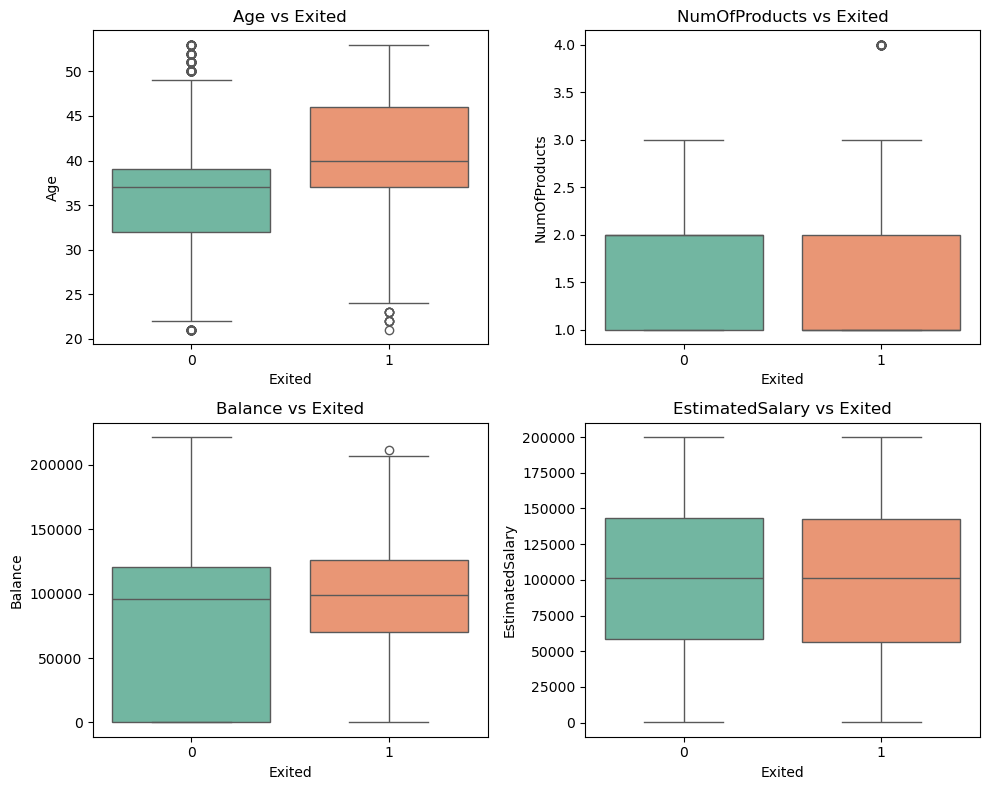

In [128]:
# Boxplot theo Exited (2 hàng x 2 cột)
cols_to_plot = ['Age', 'NumOfProducts', 'Balance', 'EstimatedSalary']

plt.figure(figsize=(10,8))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Exited', y=col, data=df, palette='Set2')
    plt.title(f"{col} vs Exited")
plt.tight_layout()
plt.show()

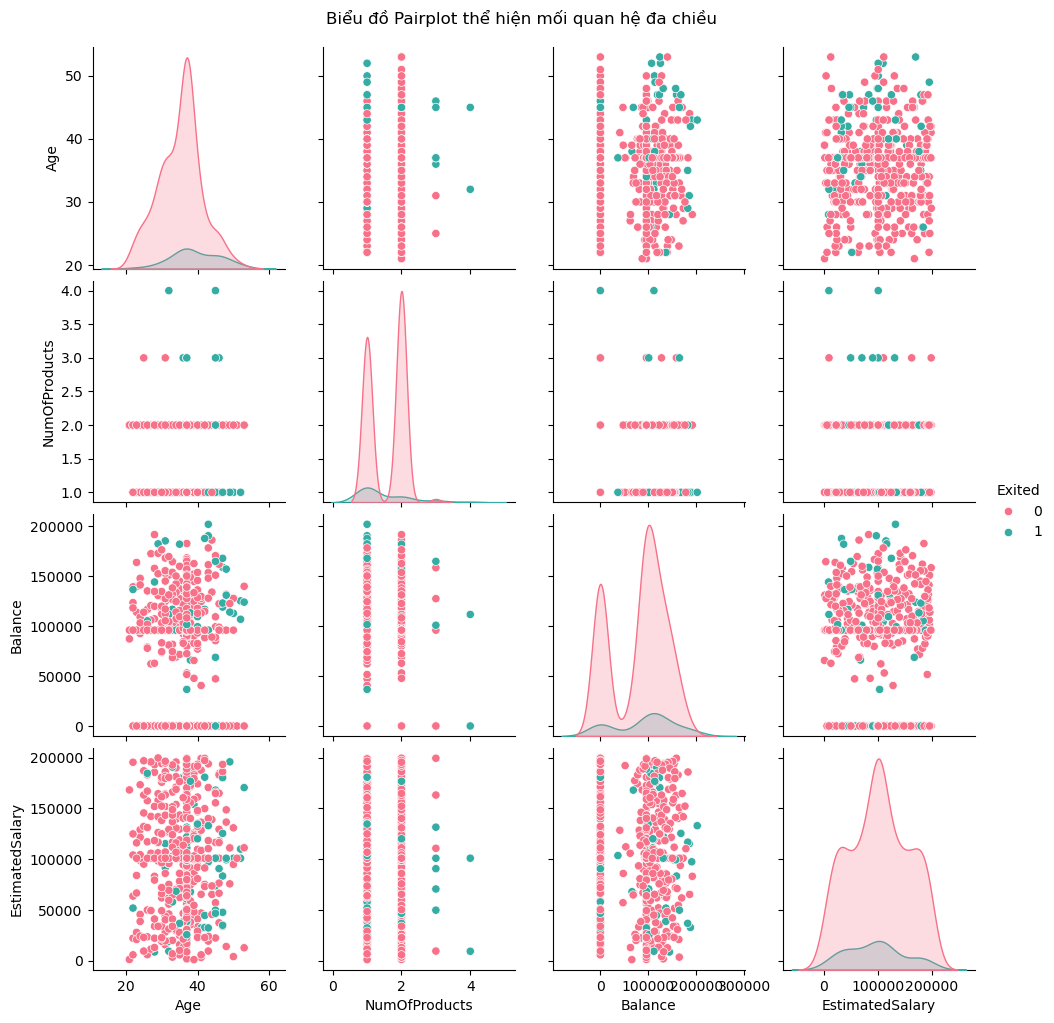

In [129]:
# Pairplot - mối quan hệ đa chiều
sample_df = df.sample(500, random_state=42)
sns.pairplot(sample_df[['Age','NumOfProducts', 'Balance','EstimatedSalary','Exited']], hue='Exited', palette='husl')
plt.suptitle("Biểu đồ Pairplot thể hiện mối quan hệ đa chiều", y=1.02)
plt.show()

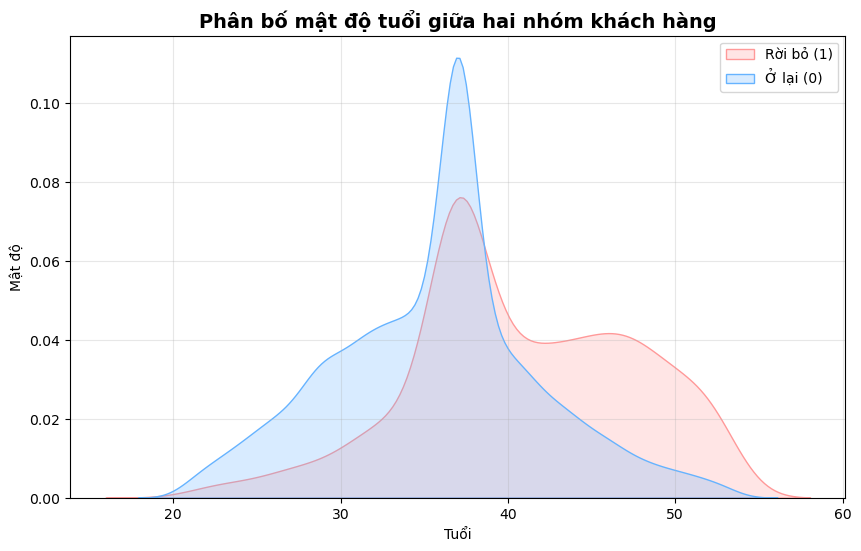

In [130]:
# KDE Plot - Phân bố tuổi theo Exited
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='Age', hue='Exited', fill=True, common_norm=False, palette=['#66b3ff','#ff9999'])
plt.title("Phân bố mật độ tuổi giữa hai nhóm khách hàng", fontsize=14, fontweight='bold')
plt.xlabel("Tuổi")
plt.ylabel("Mật độ")
plt.legend(labels=['Rời bỏ (1)','Ở lại (0)'])
plt.grid(alpha=0.3)
plt.show()

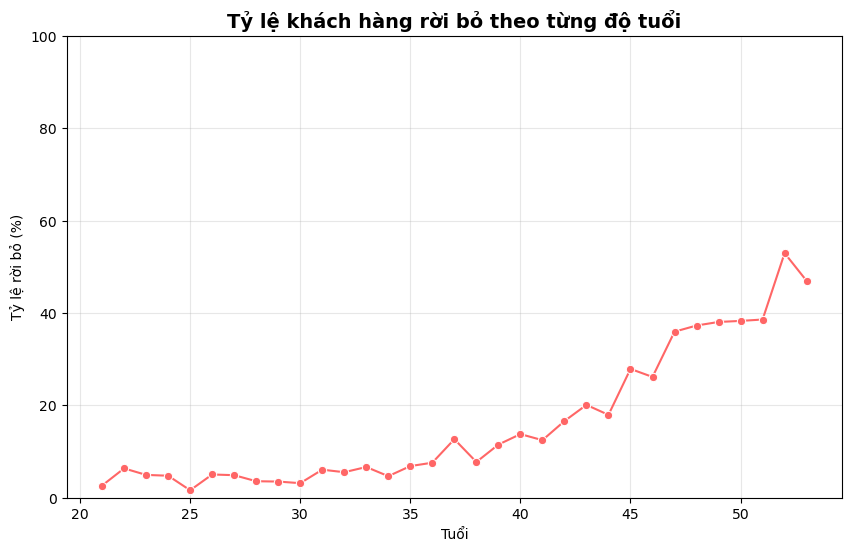

In [131]:
# Tạo bảng tỷ lệ churn theo từng độ tuổi
age_rate = df.groupby('Age')['Exited'].mean().reset_index()
age_rate['Exited'] = age_rate['Exited'] * 100  # đổi sang %

# Vẽ biểu đồ
plt.figure(figsize=(10,6))
sns.lineplot(data=age_rate, x='Age', y='Exited', color='#ff6666', marker='o')
plt.title('Tỷ lệ khách hàng rời bỏ theo từng độ tuổi', fontsize=14, fontweight='bold')
plt.xlabel('Tuổi')
plt.ylabel('Tỷ lệ rời bỏ (%)')
plt.grid(alpha=0.3)
plt.ylim(0, 100)
plt.show()

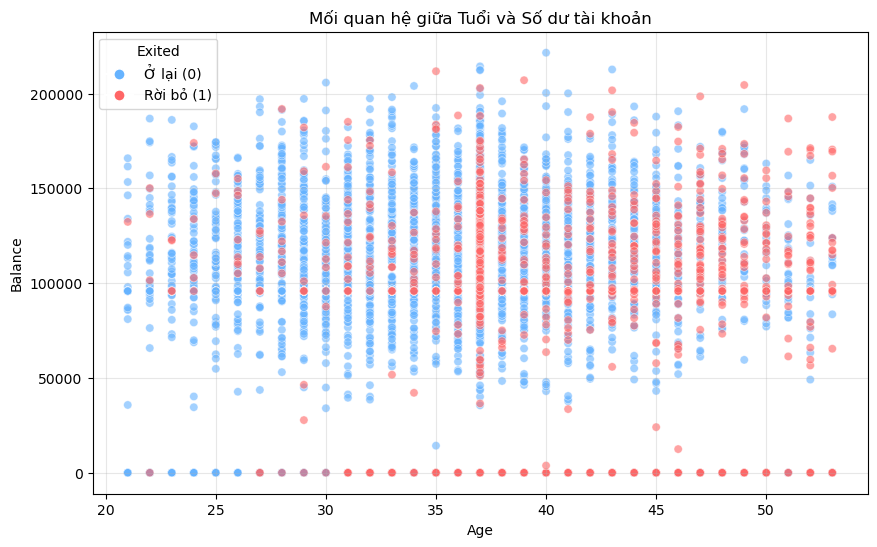

In [132]:
# Scatterplot - Tuổi vs Balance
palette = {0: '#66b3ff', 1: '#ff6666'}
plt.figure(figsize=(10,6))
ax = sns.scatterplot(data=df, x='Age', y='Balance', hue='Exited', hue_order=[0,1], palette=palette, alpha=0.6, legend=False)
legend_elements = [Line2D([0],[0], marker='o', color='w', markerfacecolor=palette[0], markersize=8, label='Ở lại (0)'),
                   Line2D([0],[0], marker='o', color='w', markerfacecolor=palette[1], markersize=8, label='Rời bỏ (1)')]
ax.legend(handles=legend_elements, title='Exited')
plt.title("Mối quan hệ giữa Tuổi và Số dư tài khoản")
plt.grid(alpha=0.3)
plt.show()

# 8️. HUẤN LUYỆN MÔ HÌNH

In [133]:
# Huấn luyện 3 mô hình
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_res, y_train_res)
y_pred_log = log_model.predict(X_test)
print("Đã huấn luyện xong mô hình Logistic Regression.")

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_res, y_train_res)
y_pred_rf = rf_model.predict(X_test)
print("Đã huấn luyện xong mô hình Random Forest.")

xgb_model = XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=6,
                          subsample=0.8, colsample_bytree=0.8, random_state=42, eval_metric='logloss')
xgb_model.fit(X_train_res, y_train_res)
y_pred_xgb = xgb_model.predict(X_test)
print("Đã huấn luyện xong mô hình XGBoost.\n")

Đã huấn luyện xong mô hình Logistic Regression.
Đã huấn luyện xong mô hình Random Forest.
Đã huấn luyện xong mô hình XGBoost.



# 9️. ĐÁNH GIÁ MÔ HÌNH

In [146]:
models = {
    "Logistic Regression": (log_model, y_pred_log),
    "Random Forest": (rf_model, y_pred_rf),
    "XGBoost": (xgb_model, y_pred_xgb)
}

compare = []
for name, (model, pred) in models.items():
    acc = accuracy_score(y_test, pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    f1 = classification_report(y_test, pred, output_dict=True)['weighted avg']['f1-score']
    compare.append([name, acc, auc, f1])

compare_df = pd.DataFrame(compare, columns=['Model','Accuracy','AUC','F1-score'])
print(compare_df)

                 Model  Accuracy       AUC  F1-score
0  Logistic Regression  0.687154  0.739678  0.739415
1        Random Forest  0.857406  0.781045  0.854457
2              XGBoost  0.882606  0.778668  0.867814


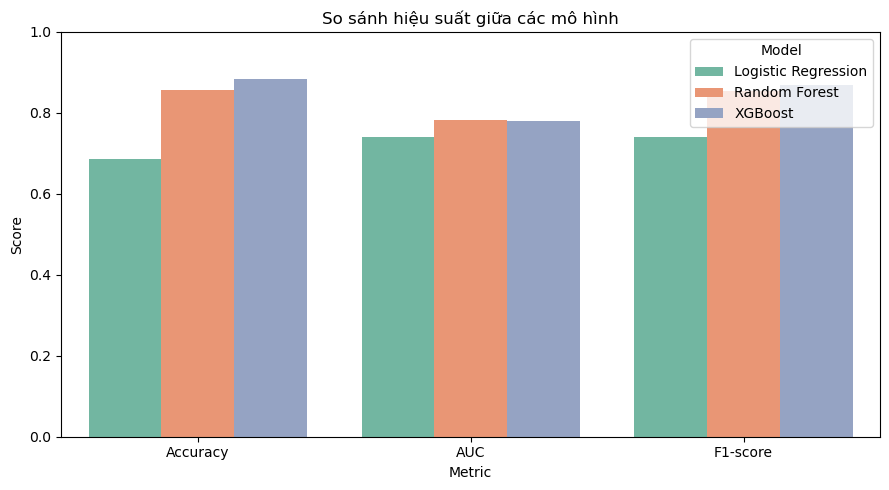

In [135]:
# Biểu đồ so sánh hiệu suất giữa các mô hình
plt.figure(figsize=(9,5))
sns.barplot(data=compare_df.melt(id_vars='Model', var_name='Metric', value_name='Score'),
            x='Metric', y='Score', hue='Model', palette='Set2')
plt.title("So sánh hiệu suất giữa các mô hình")
plt.ylim(0,1)
plt.tight_layout()
plt.show()

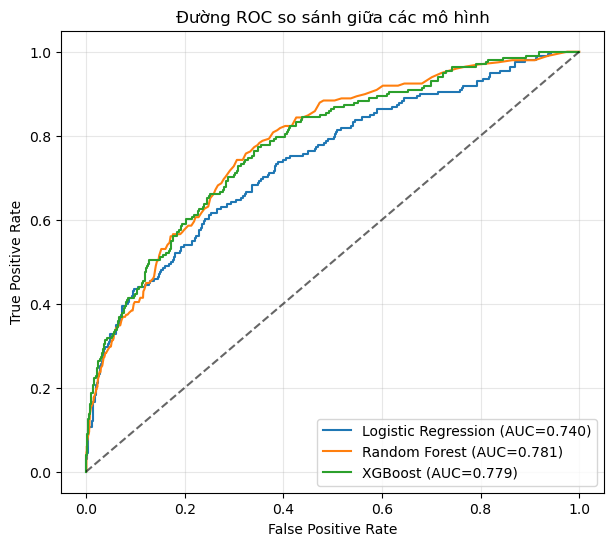

In [136]:
# ROC CURVE
plt.figure(figsize=(7,6))
for name, (model, pred) in models.items():
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_score:.3f})")
plt.plot([0,1],[0,1],'k--',alpha=0.6)
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("Đường ROC so sánh giữa các mô hình"); plt.legend(); plt.grid(alpha=0.3)
plt.show()

# 10. FEATURE IMPORTANCE

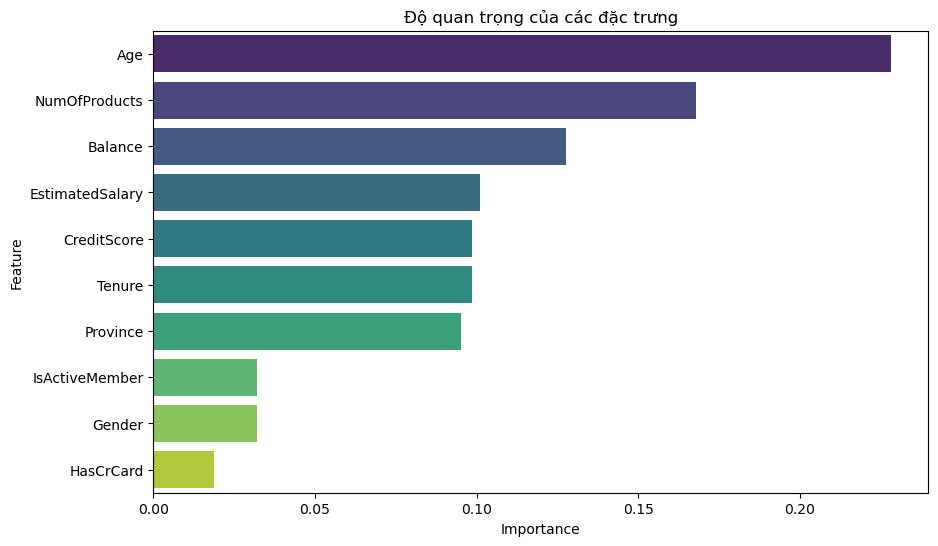

In [137]:
# Phân tích tầm quan trọng của đặc trưng
importances = rf_model.feature_importances_
feature_imp = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=feature_imp, x='Importance', y='Feature', palette='viridis')
plt.title("Độ quan trọng của các đặc trưng")
plt.show()

# 11. PHÂN TÍCH SHAP (XGBoost)

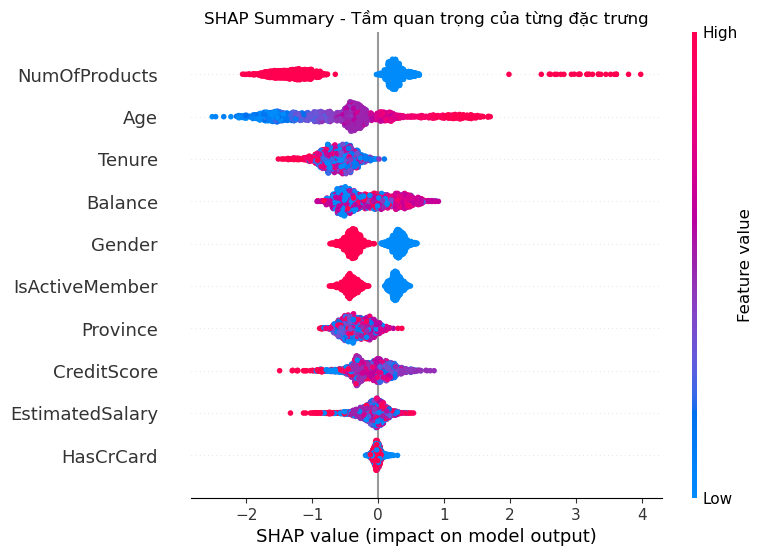

In [138]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Biểu đồ tầm quan trọng các đặc trưng
plt.figure(figsize=(10,6))
shap.summary_plot(shap_values, X_test, feature_names=features, show=False)
plt.title("SHAP Summary - Tầm quan trọng của từng đặc trưng")
plt.show()

<Figure size 800x500 with 0 Axes>

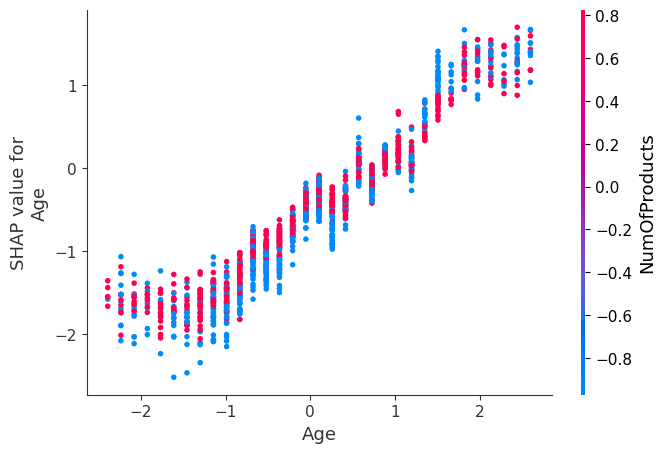

In [139]:
# Ảnh hưởng của độ tuổi đến khả năng rời bỏ
plt.figure(figsize=(8,5))
shap.dependence_plot("Age", shap_values, X_test, feature_names=features)
plt.show()

In [140]:
# Giải thích dự đoán cho một khách hàng cụ thể
sample_idx = 10
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[sample_idx], X_test[sample_idx], feature_names=features)